<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 2</b></center>    
<pre>    

# EDA & Pipeline: Google Play Store Apps

**Dataset:** Google Play Store Apps (Available on Kaggle) <BR>
**Objective:** Transform raw, messy data into clean, actionable insights using Pandas and Scikit-Learn pipelines.<BR>
**Focus:** Data Cleaning, String Sanitization, Advanced Imputation, Correlation, and Pipelines.<BR>

### 1. Setup & Initialization

**Exercise 1: Import Dependencies**
* Import `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
* Set pandas options to display all columns (visual aid).

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Exercise 2: Data Loading & Initial Inspection**
* Load the `googleplaystore.csv` file.
* Display the first 5 rows.
* **Check:** Look closely at the `Installs`, `Size`, and `Price` columns. Notice they are currently Objects (strings), not numbers.

In [121]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Data Integrity Check

**Exercise 3: Audit Data Types and Missing Values**
* Use a single command to view data types (`dtypes`) and non-null counts.
* Calculate the *percentage* of missing values for each column.

In [122]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [116]:
print((df.isna().sum() / df.shape[0]) * 100)

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


**Exercise 4: Handling Duplicates**
* Duplicate entries skew results. Check for duplicate rows.
* Drop duplicates, keeping the *first* occurrence. Verify the shape change.

In [123]:
print(f"Number of duplicated rows before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicated rows after: {df.duplicated().sum()}")


Number of duplicated rows before: 483
Number of duplicated rows after: 0


### 3. Advanced String Sanitization (Crucial Step)

**Exercise 5: Cleaning the 'Installs' Column**
* The `Installs` column contains characters like `+` and `,` (e.g., "10,000+").
* Remove these characters.
* Convert the column to a numeric integer type.

In [124]:
# use Column.astype(str).str.replace
df["Installs"] = df["Installs"].astype(str).str.replace("+", "")
df["Installs"] = df["Installs"].astype(str).str.replace(",", "")

In [125]:
# use to_numeric to convert to int
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

In [126]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Exercise 6: Cleaning the 'Price' Column**
* The `Price` column contains the `$` symbol (e.g., "$4.99").
* Remove the symbol.
* Convert the column to a `float`.

In [127]:
# Same as Above
df["Price"] = df["Price"].str.replace("$", "")

In [128]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

In [129]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Exercise 7: Complex Logic - Sanitizing 'Size'**
* The `Size` column is messy. It contains 'M' (Megabytes), 'k' (kilobytes), and string 'Varies with device'.
* **Task:** Write a function (or apply lambda) to:
    1.  Replace 'k' with 'e+3' and 'M' with 'e+6'.
    2.  Coerce 'Varies with device' to `NaN`.
    3.  Convert the string to a number.

In [130]:
def clean_size(x):
    x = str(x)
    if 'M' in x:
        # Convert 19M to 19000000
        x = x.replace('M', '')
        return float(x) * (10**6)
        
    elif 'k' in x:
        # Convert 500k to 500000
        x = x.replace('k', '')
        return float(x) * (10**3)
        
    elif 'Varies with device' in x:
        # Handle string edge case
        return np.nan
        
    else:
        # Attempt to convert or return NaN
        try:
            return float(x)
        except:
            return np.nan

In [131]:

df["Size"] = df["Size"].apply(clean_size)

In [132]:
df["Size"].dtype

dtype('float64')

In [133]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 4. Advanced Imputation

**Exercise 8: Analyzing Missing 'Rating'**
* The `Rating` column has missing values.
* **Visualize** the distribution of Ratings using a Histogram or KDE plot to decide between Mean vs Median imputation.

In [134]:
df["Rating"].isna().sum()

np.int64(1465)

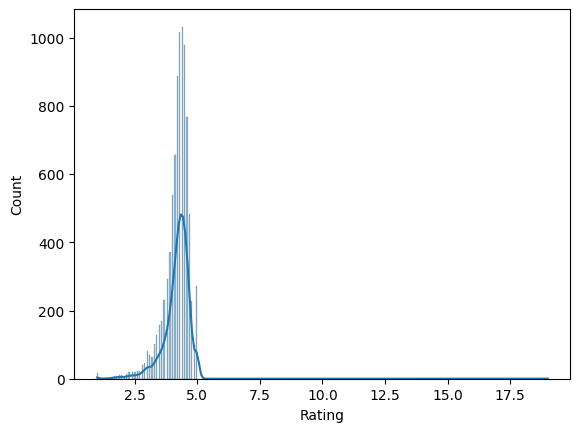

In [135]:
sns.histplot(df["Rating"], kde=True)
plt.show()

**Exercise 9: Group-Specific Imputation**
* Fill missing `Rating` values with the **Median Rating** of the specific `Category` the app belongs to.
* *Example:* If a "Business" app is missing a rating, fill it with the median rating of all "Business" apps.

In [136]:
df['Rating'] = df.groupby('Category')['Rating'].transform(
    lambda x: x.fillna(x.median())
)
df

#After this use transform Method

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000.0,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [137]:
df["Rating"].isna().sum()

np.int64(0)

**Exercise 10: Drop Remaining NaNs**
* For the remaining columns with minimal missing data (like `Current Ver`), simply drop the rows containing NaNs to ensure a clean dataset for correlation.

In [138]:
df = df.dropna()

In [139]:
df.isna().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 5. Correlation & Visualization

**Exercise 11: Correlation Matrix**
* Generate a correlation matrix for the numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, `Price`).

In [112]:
df["Size"] = pd.to_numeric(df["Size"], errors='coerce')


C:\Users\DELL\AppData\Local\Temp\ipykernel_13812\1677297191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Size"] = pd.to_numeric(df["Size"], errors='coerce')


In [140]:
df.corr(numeric_only=True)

,Rating,Size,Installs,Price
Rating,1.000000,0.065161,0.048168,-0.019242
Size,0.065161,1.000000,0.168805,-0.023818
Installs,0.048168,0.168805,1.000000,-0.010290
Price,-0.019242,-0.023818,-0.010290,1.000000


In [ ]:

# Hint: numeric_only Use CORR





,Rating,Size,Installs,Price
Rating,1.000000,0.065161,0.048168,-0.019242
Size,0.065161,1.000000,0.168805,-0.023818
Installs,0.048168,0.168805,1.000000,-0.010290
Price,-0.019242,-0.023818,-0.010290,1.000000


**Exercise 12: Heatmap Visualization**
* Visualize the correlation matrix using a Seaborn Heatmap.
* Annotate the values.

<Axes: >

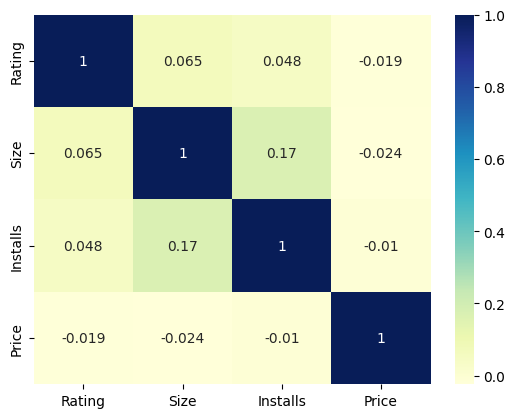

In [146]:
# Hint: sns.heatmap

sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)


**Exercise 13: Scatter Plot Analysis**
* Create a Scatter Plot to analyze the relationship between `Reviews` and `Installs`.
* **Note:** You might need to use a log scale for the axes if the data is skewed.

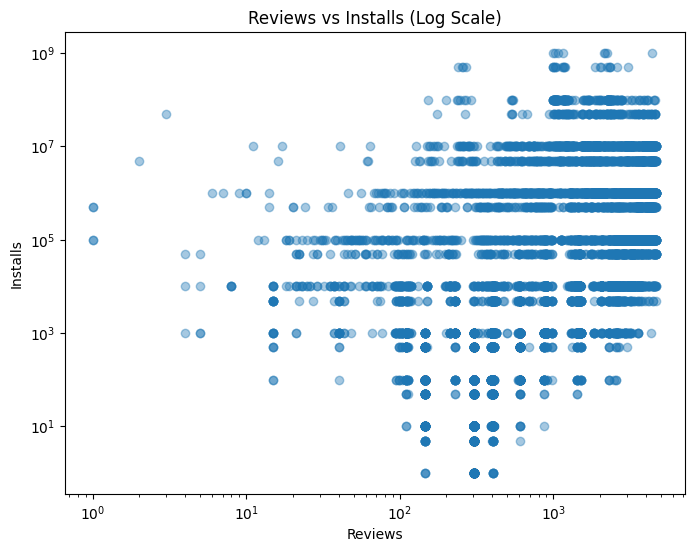

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(df["Reviews"], df["Installs"], alpha=0.4)
plt.xlabel("Reviews")
plt.ylabel("Installs")
plt.xscale("log")
plt.yscale("log")
plt.title("Reviews vs Installs (Log Scale)")
plt.show()

In [ ]:
# If needed
#plt.xscale('log')
#plt.yscale('log')
#plt.title('Reviews vs Installs (Log Scale)')
#plt.show()

**Exercise 14: Categorical Aggregation**
* Create a Bar Plot showing the top 10 Categories by **Total Installs**.

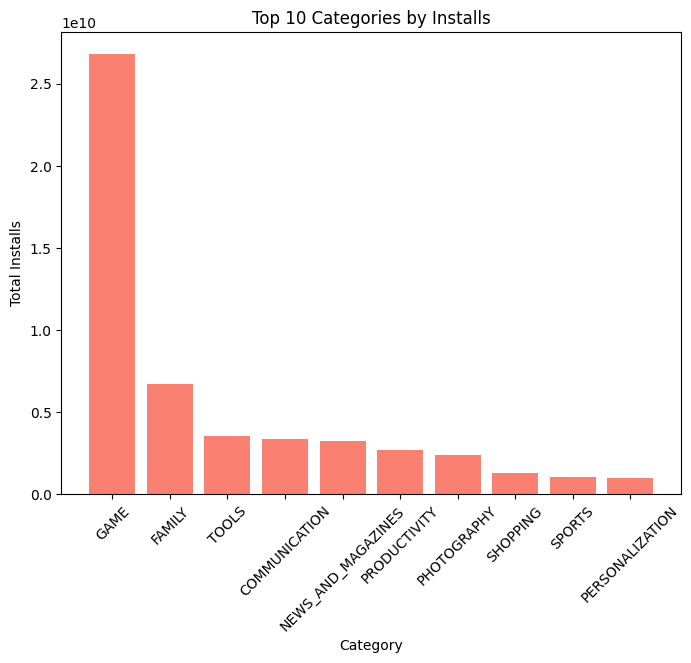

In [162]:

top_cats = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.bar(top_cats.index, top_cats.values, color="salmon")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Installs")
plt.title("Top 10 Categories by Installs")
plt.show()

### 6. Building a Sklearn Pipeline

**Exercise 15: Preprocessing Pipeline**
* Imagine you want to predict the `Rating` (Target).
* Create a Scikit-Learn `ColumnTransformer` that:
    1.  StandardScales the numerical features (`Reviews`, `Size`, `Installs`, `Price`).
    2.  OneHotEncodes the categorical feature (`Category`, `Content Rating`).
* Display the pipeline object.

In [174]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_columns = ["Reviews", "Size", "Installs", "Price"]
categorical_columns = ["Category", "Content Rating"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

X_processed = pipeline.fit_transform(df)

pipeline

,steps,"[('preprocessor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Without Pipline

In [ ]:
from sklearn.preprocessing import StandardScaler

# Use

--- Numeric Scaling Results ---
  Reviews  Reviews_Scaled
0     159       -0.146291
1     967       -0.145787
2   87510       -0.091790
3  215644       -0.011842
4     967       -0.145787


,Cat_1.9,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,Cat_COMICS,Cat_COMMUNICATION,Cat_DATING,Cat_EDUCATION,...,Cat_PERSONALIZATION,Cat_PHOTOGRAPHY,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# With Pipline(Optional part)

In [ ]:

# Hint: from sklearn.compose import ColumnTransformer
# Hint: from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Hint: from sklearn.pipeline import Pipeline


